In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,Conv2D,MaxPooling2D,BatchNormalization, GlobalAvgPool2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os

In [ ]:
base_dir = '/dataset-resize'
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'val')

In [5]:
os.listdir(train_dir)

['apple',
 'avocado',
 'banana',
 'durian',
 'guava',
 'kiwi',
 'langsat',
 'mango',
 'melon',
 'orange',
 'papaya',
 'pineapple',
 'rambutan',
 'salak',
 'water-guava',
 'watermelon']

In [6]:
os.listdir(val_dir)

['apple',
 'avocado',
 'banana',
 'durian',
 'guava',
 'kiwi',
 'langsat',
 'mango',
 'melon',
 'orange',
 'papaya',
 'pineapple',
 'rambutan',
 'salak',
 'water-guava',
 'watermelon']

In [7]:
labels = os.listdir(train_dir)

train_data = ImageDataGenerator(rescale=1.0/255)

val_data = ImageDataGenerator(rescale=1.0/255)

train_generator = train_data.flow_from_directory(
    train_dir,
    classes=labels,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

val_generator = val_data.flow_from_directory(
    val_dir,
    classes=labels,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

Found 2560 images belonging to 16 classes.
Found 640 images belonging to 16 classes.


In [8]:
model = Sequential([
    Conv2D(32, 3,activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(4),
    BatchNormalization(),

    Conv2D(64, 3,activation='relu'),
    MaxPooling2D(4),
    BatchNormalization(),

    Conv2D(128, 3,activation='relu'),
    MaxPooling2D(4),
    BatchNormalization(),

    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(16,activation='softmax')
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    verbose=1
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


80/80 ━━━━━━━━━━━━━━━━━━━━ 723s 8s/step - accuracy: 0.1375 - loss: 2.8886 - val_accuracy: 0.0688 - val_loss: 2.9306
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 154ms/step - accuracy: 0.3330 - loss: 2.0665 - val_accuracy: 0.0625 - val_loss: 3.1377
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 153ms/step - accuracy: 0.4117 - loss: 1.7796 - val_accuracy: 0.1187 - val_loss: 3.1929
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 149ms/step - accuracy: 0.4816 - loss: 1.6178 - val_accuracy: 0.1672 - val_loss: 3.0158
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 151ms/step - accuracy: 0.5182 - loss: 1.5201 - val_accuracy: 0.2625 - val_loss: 2.2363
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 152ms/step - accuracy: 0.5549 - loss: 1.3692 - val_accuracy: 0.4078 - val_loss: 1.8114
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 153ms/step - accuracy: 0.6145 - loss: 1.2155 - val_accuracy: 0.4437 - val_loss: 1.7477
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 152ms/step - accuracy: 0.6452 - loss: 1.1402 - val_accuracy: 0.5453 

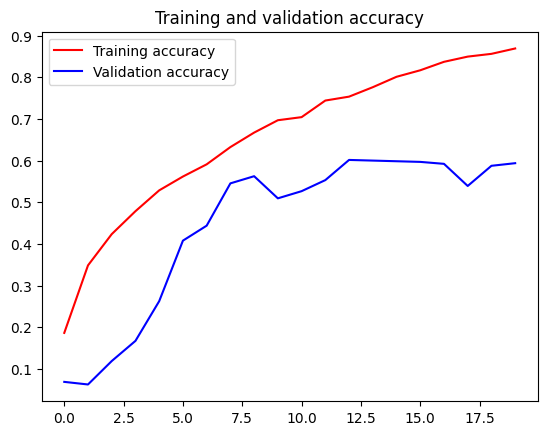

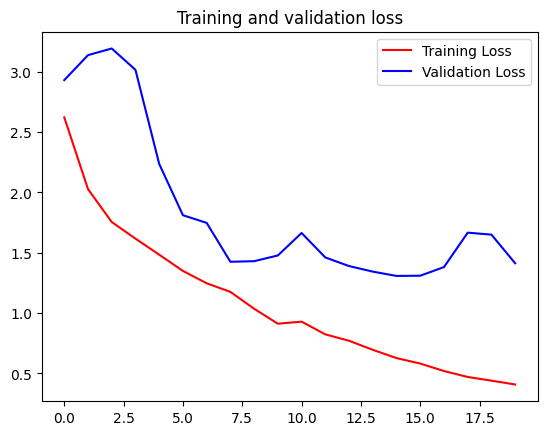

In [11]:
# prompt: make a code to check the grapich of epoch for this model.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
# Fine-tuning: Load pre-trained model (e.g., MobileNetV2) and freeze initial layers
base_model = tf.keras.applications.MobileNetV2(input_shape=(150, 150, 3),
                                               include_top=False,
                                               weights='imagenet')

# Freeze the base model layers
base_model.trainable = False

# Create a new model on top
inputs = tf.keras.Input(shape=(150, 150, 3))
x = base_model(inputs, training=False)
x = GlobalAvgPool2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(len(labels), activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(optimizer="adam", loss=tf.keras.losses.CategoricalCrossentropy(), metrics=["accuracy"])
model.summary()

# Train the model (initial training)
history = model.fit(train_generator, validation_data=val_generator, epochs=10, verbose=1) # Reduced epochs for initial training

# Unfreeze some layers of the base model for fine-tuning
base_model.trainable = True
fine_tune_at = 100 # Example: Fine-tune from layer 100 onwards
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

# Recompile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),  # Lower learning rate
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


# Continue training (fine-tuning)
history_fine = model.fit(train_generator, validation_data=val_generator, epochs=10, initial_epoch=len(history.history['loss']), verbose=1) # Continue from previous epoch



<ipython-input-15-bcd1e51b757a>:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=(150, 150, 3),


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 5, 5, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │           4,112 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,590,032 (9.88 MB)

 Trainable params: 332,048 (1.27 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 26s 198ms/step - accuracy: 0.3311 - loss: 2.4209 - val_accuracy: 0.7266 - val_loss: 0.9007
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 155ms/step - accuracy: 0.7446 - loss: 0.8272 - val_accuracy: 0.7719 - val_loss: 0.7157
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 152ms/step - accuracy: 0.7994 - loss: 0.6237 - val_accuracy: 0.7797 - val_loss: 0.7092
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 151ms/step - accuracy: 0.8416 - loss: 0.4964 - val_accuracy: 0.7891 - val_loss: 0.7160
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 153ms/step - accuracy: 0.8700 - loss: 0.4119 - val_accuracy: 0.8234 - val_loss: 0.6159
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 153ms/step - accuracy: 0.9080 - loss: 0.2955 - val_accuracy: 0.8125 - val_loss: 0.6029
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 151ms/step - accuracy: 0.9299 - loss: 0.2274 - val_accuracy: 0.8234 - val_loss: 0.5950
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 151ms/step - accuracy: 0.9462 - loss: 0.1919 - val_accu

In [19]:
# prompt: make a code who test the model with the input button

import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np
from PIL import Image

# Function to preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path).resize((150, 150))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to make predictions
def predict_image(image_path):
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)
    predicted_class_index = np.argmax(predictions)
    predicted_class = labels[predicted_class_index]
    return predicted_class, predictions


# Create an upload button
upload_button = widgets.FileUpload(accept='image/*', multiple=False)

# Create an output widget to display the results
output = widgets.Output()


def on_upload_change(change):
    with output:
        clear_output()
        if upload_button.value:
            uploaded_file = list(upload_button.value.values())[0]
            image_path = '/content/uploaded_image.jpg'  # Temporary file path
            with open(image_path, 'wb') as f:
                f.write(uploaded_file['content'])

            predicted_class, predictions = predict_image(image_path)

            print(f"Predicted Class: {predicted_class}")
            print("Probabilities:")
            for i, prob in enumerate(predictions[0]):
                print(f"- {labels[i]}: {prob:.4f}")

# Register the callback function
upload_button.observe(on_upload_change, names='value')

# Display the upload button and the output widget
display(upload_button)
display(output)

FileUpload(value={}, accept='image/*', description='Upload')

Output()

In [20]:
model.save('model.h5')

In [25]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>